In [13]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
x0=-0.1
p0=0
hbar=0.008
re_co=x0/np.sqrt(2*hbar)
im_co=p0/np.sqrt(2*hbar)
N=25
psi0=coherent(N,re_co+1j*im_co)

In [25]:
H0=hbar*(num(N)+0.5*qeye(N))+(hbar**2/16)*(create(N)+destroy(N))**4
H1=-1*np.sqrt(hbar/2)*(create(N)+destroy(N))
H0=H0/hbar
H1=H1/hbar


In [36]:
f=0.01
w=1.04
T=2*np.pi/w
args={'F':f,'w':w}


In [37]:
H=[H0,[H1,'F*cos(w*t)']]

In [38]:
times=np.arange(0,30*T,0.1)


In [39]:
result=sesolve(H,psi0,times,args=args,progress_bar=True)


10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.13s. Est. time left: 00:00:00:00
30.0%. Run time:   0.19s. Est. time left: 00:00:00:00
40.0%. Run time:   0.25s. Est. time left: 00:00:00:00
50.0%. Run time:   0.32s. Est. time left: 00:00:00:00
60.0%. Run time:   0.38s. Est. time left: 00:00:00:00
70.0%. Run time:   0.45s. Est. time left: 00:00:00:00
80.0%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.70s


In [40]:
xvec=np.linspace(-0.5,0.5,100)
gv=np.sqrt(2/hbar)

In [41]:
W=wigner(result.states[-1],xvec,xvec,g=gv)

In [42]:
import matplotlib as mpl
from matplotlib import cm


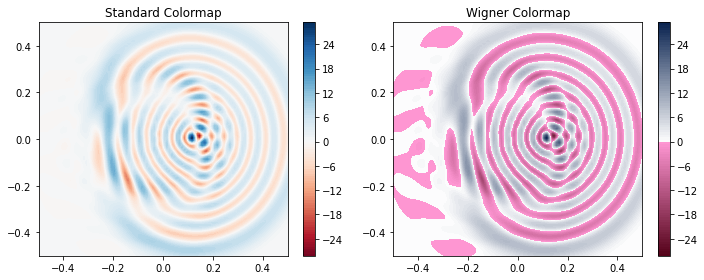

In [43]:
wmap=wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax=axes[0])
plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap) 
axes[1].set_title("Wigner Colormap")
cb2 = fig.colorbar(plt2, ax=axes[1])
fig.tight_layout()
#plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_isolatedduffing_N=25_x0=-0.1_t=30T.png')
plt.show()

In [44]:

data=np.multiply(np.sign(W),np.power(np.abs(W),0.25))

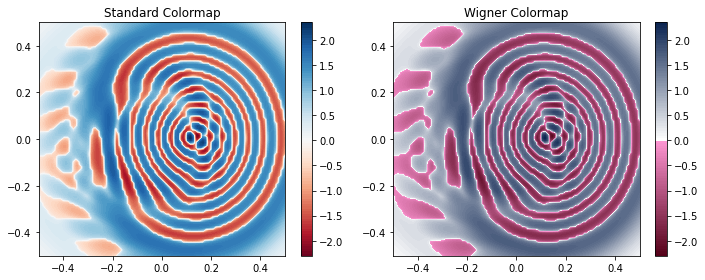

In [45]:
wmap=wigner_cmap(data)
nrm = mpl.colors.Normalize(-data.max(), data.max())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt1 = axes[0].contourf(xvec, xvec, data, 100, cmap=cm.RdBu, norm=nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax=axes[0])
plt2 = axes[1].contourf(xvec, xvec, data, 100, cmap=wmap) 
axes[1].set_title("Wigner Colormap")
cb2 = fig.colorbar(plt2, ax=axes[1])
fig.tight_layout()
#plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_isolatedduffing_N=25_x0=-0.1_t=300T_power=quarter.png')
plt.show()